In [ ]:
dict(
    author="Rob Stenson",
    title="Overview",
    date="1/6/2023",
)

In [2]:
#hide-publish
from coldtype.notebook import *

## Anatomy of a Coldtype Program

When run locally with the coldtype viewer, a coldtype program is a source file, a Python file with a ``*.py`` file extension. Inside that file, you can write anything you want, but at the very least you'll need do two things:

1. Import the coldtype library
2. Define a renderable function

So to get going from scratch, create a new Python source file, something like *anatomy.py* or whatever you want to call it.

Then for the first line:

```python
from coldtype import *
```

(You could also do `import coldtype`, but for the examples in this documentation, `from coldtype import *` is the idiomatic import.)

For the second requirement – **defining a renderable function** — all you need is a function that accepts a single argument, a `Rect`, like so:

```python
def show_something(r:Rect):
    return P().rect(r)
```

If you followed the install instructions and have activated your virtual environment, you can now run this file from the command-line, like so:

```
coldtype anatomy.py
```

Unfortunately, you won't see anything other than a window that pops up and says: "Nothing found."

That's because we didn't tell the renderer that anything in our source file is `renderable`. We can remedy that situation by adding the `@renderable` decorator right above where we define our rendering function.

So let’s create a new function and mark it as renderable.


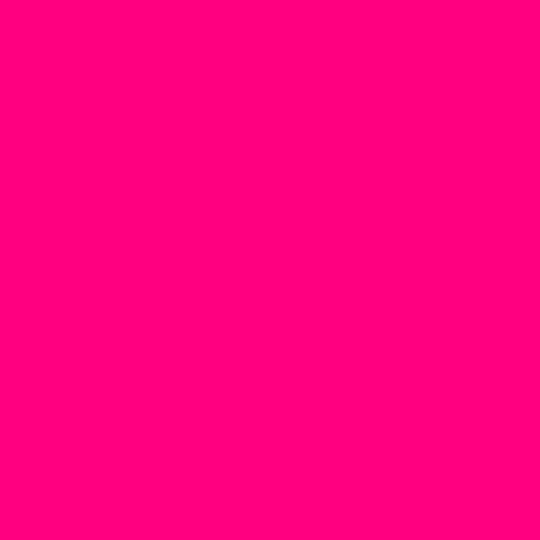

In [3]:
@renderable()
def really_show_something(r:Rect):
    return P().rect(r)

Now when you save the source file (no need to stop it and restart it on the command line), you should see a gigantic pink rectangle. If you try changing something about that rectangle, like adding `.f(hsl(random()))` to the end of the return statement, or change the `.rect` to an `.oval`, as soon as you save the source file, you should see changes in the viewer.


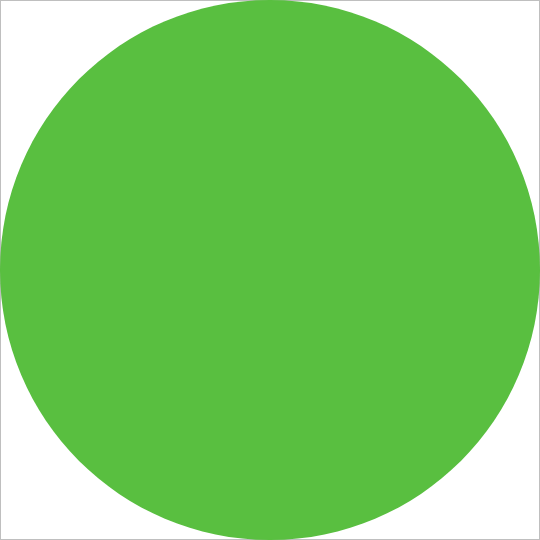

In [4]:
@renderable()
def really_show_something(r:Rect):
    return P().oval(r).f(hsl(0.3))

What about text?


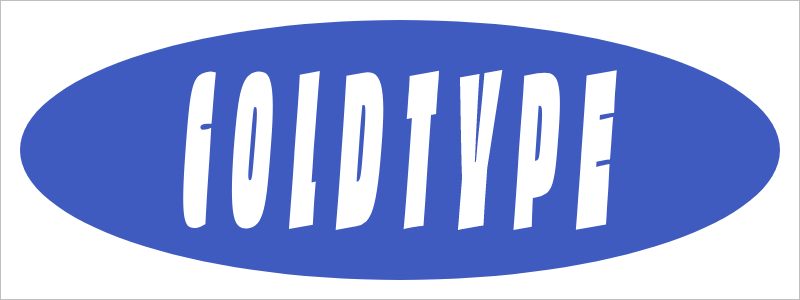

In [7]:
@renderable((800, 300))
def sample_text(r):
    return P(
        P().oval(r.inset(20)).f(hsl(random())),
        StSt("COLDTYPE",
            Font.ColdtypeObviously(), 200,
            wdth=0, tu=100, rotate=10)
            .align(r)
            .f(1))

(Some of that text-setting code might seem a little bewildering, but all of it’s covered in the Text tutorial in this documentation.)

## Workflow of a Coldtype Program

At this point you might be wondering, *how do I save what's on screen to a file on my computer?*

If you’re familiar with DrawBot, you might think you need to write some code to do that, but one of the core tenets of coldtype is that rendering and rasterizing are handled by the renderer, not by the source code. This makes some things that are easy in DrawBot difficult in Coldtype, but it also makes many things that are difficult in DrawBot extremely easy in Coldtype.

If you have your program running, to render what you have so far to disk, you can focus on the Coldtype viewer window and hit the `a` key on your keyboard. That should print some things out on the command-line, including the path of a brand-new png file.

A few notes:

* The name of the file created is the name of the source file combined with the name of the function. So in this case, the `sample_text` function rendered to a png called `renders/overview_sample_text.png`. The `renders` folder is automatically created by the renderer. (All of this can be customized, but this is the default behavior for all non-animation graphics.)

* `a` stands for "all," as in `render-all`. In Coldtype there is a distinction between rendering all of what a file represents, versus just a segment (workarea) of what a file represents. If you're coding a small number of static graphics like the pink rectangle in our source file, the distinction between render-all and render-workarea is basically meaningless, because it takes such a short amount of time to render everything. But when you’re working on an animation — when you’re rendering 3000 frames and each frame takes a few milliseconds to render — the distinction becomes crucial.